#Problem  statement : 
#predict the sales of retail stores 

#importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the data

In [ ]:
file1=pd.read_csv("train_data.csv")
file2=pd.read_csv("product_prices.csv")
file3=pd.read_csv("date_to_week_id_map.csv")
test=pd.read_csv("test_data.csv")

print(file1.shape)
print(file2.shape)
print(file3.shape)
print(test.shape)

(395000, 7)
(59000, 4)
(821, 2)
(15500, 7)


In [ ]:
file1.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [ ]:
file2.head()

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


In [ ]:
file3.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


merging the files by using the merge 

In [ ]:
df_1=file2.merge(file3,on='week_id', how='inner') # merging df_1 and file3 based on id
df_1.head()

,outlet,product_identifier,week_id,sell_price,date
0,111,74,49,2.94,2012-01-01
1,111,74,49,2.94,2012-01-02
2,111,74,49,2.94,2012-01-03
3,111,74,49,2.94,2012-01-04
4,111,74,49,2.94,2012-01-05


In [ ]:
df_1.shape

(410500, 5)

In [ ]:
df=df_1.merge(file1,on=['date','product_identifier','outlet'], how='inner') # merging file1 and file2 based on outlet
df.head()

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state,sales
0,111,74,49,2.94,2012-01-01,11,others,Maharashtra,0
1,111,74,49,2.94,2012-01-02,11,others,Maharashtra,0
2,111,74,49,2.94,2012-01-03,11,others,Maharashtra,1
3,111,74,49,2.94,2012-01-04,11,others,Maharashtra,0
4,111,74,49,2.94,2012-01-05,11,others,Maharashtra,0


In [ ]:
df.shape

(395000, 9)

In [ ]:
df.isnull().sum()

outlet                   0
product_identifier       0
week_id                  0
sell_price               0
date                     0
department_identifier    0
category_of_product      0
state                    0
sales                    0
dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)# changing data dtype to datatime64
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.head()

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state,sales,year,month,day
0,111,74,49,2.94,2012-01-01,11,others,Maharashtra,0,2012,1,1
1,111,74,49,2.94,2012-01-02,11,others,Maharashtra,0,2012,1,2
2,111,74,49,2.94,2012-01-03,11,others,Maharashtra,1,2012,1,3
3,111,74,49,2.94,2012-01-04,11,others,Maharashtra,0,2012,1,4
4,111,74,49,2.94,2012-01-05,11,others,Maharashtra,0,2012,1,5


In [ ]:
df=df.drop('date',axis=1)
df.head()

,outlet,product_identifier,week_id,sell_price,department_identifier,category_of_product,state,sales,year,month,day
0,111,74,49,2.94,11,others,Maharashtra,0,2012,1,1
1,111,74,49,2.94,11,others,Maharashtra,0,2012,1,2
2,111,74,49,2.94,11,others,Maharashtra,1,2012,1,3
3,111,74,49,2.94,11,others,Maharashtra,0,2012,1,4
4,111,74,49,2.94,11,others,Maharashtra,0,2012,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   outlet                 395000 non-null  int64  
 1   product_identifier     395000 non-null  int64  
 2   week_id                395000 non-null  int64  
 3   sell_price             395000 non-null  float64
 4   department_identifier  395000 non-null  int64  
 5   category_of_product    395000 non-null  object 
 6   state                  395000 non-null  object 
 7   sales                  395000 non-null  int64  
 8   year                   395000 non-null  int64  
 9   month                  395000 non-null  int64  
 10  day                    395000 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 36.2+ MB


In [ ]:
df.describe()

,outlet,product_identifier,week_id,sell_price,department_identifier,sales,year,month,day
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,211.200000,1509.960000,105.070886,4.987644,24.460000,1.228919,2012.611392,6.143038,15.705063
std,91.161291,809.799518,32.578749,3.874444,6.337863,3.595266,0.622061,3.576092,8.787969
min,111.000000,74.000000,49.000000,0.050000,11.000000,0.000000,2012.000000,1.000000,1.000000
25%,113.000000,926.000000,77.000000,2.680000,21.000000,0.000000,2012.000000,3.000000,8.000000
50%,221.500000,1325.000000,105.000000,3.980000,22.000000,0.000000,2013.000000,6.000000,16.000000
75%,331.000000,1753.000000,133.000000,6.480000,31.000000,1.000000,2013.000000,9.000000,23.000000
max,333.000000,3021.000000,161.000000,44.360000,33.000000,293.000000,2014.000000,12.000000,31.000000


In [ ]:
df.shape

(395000, 11)

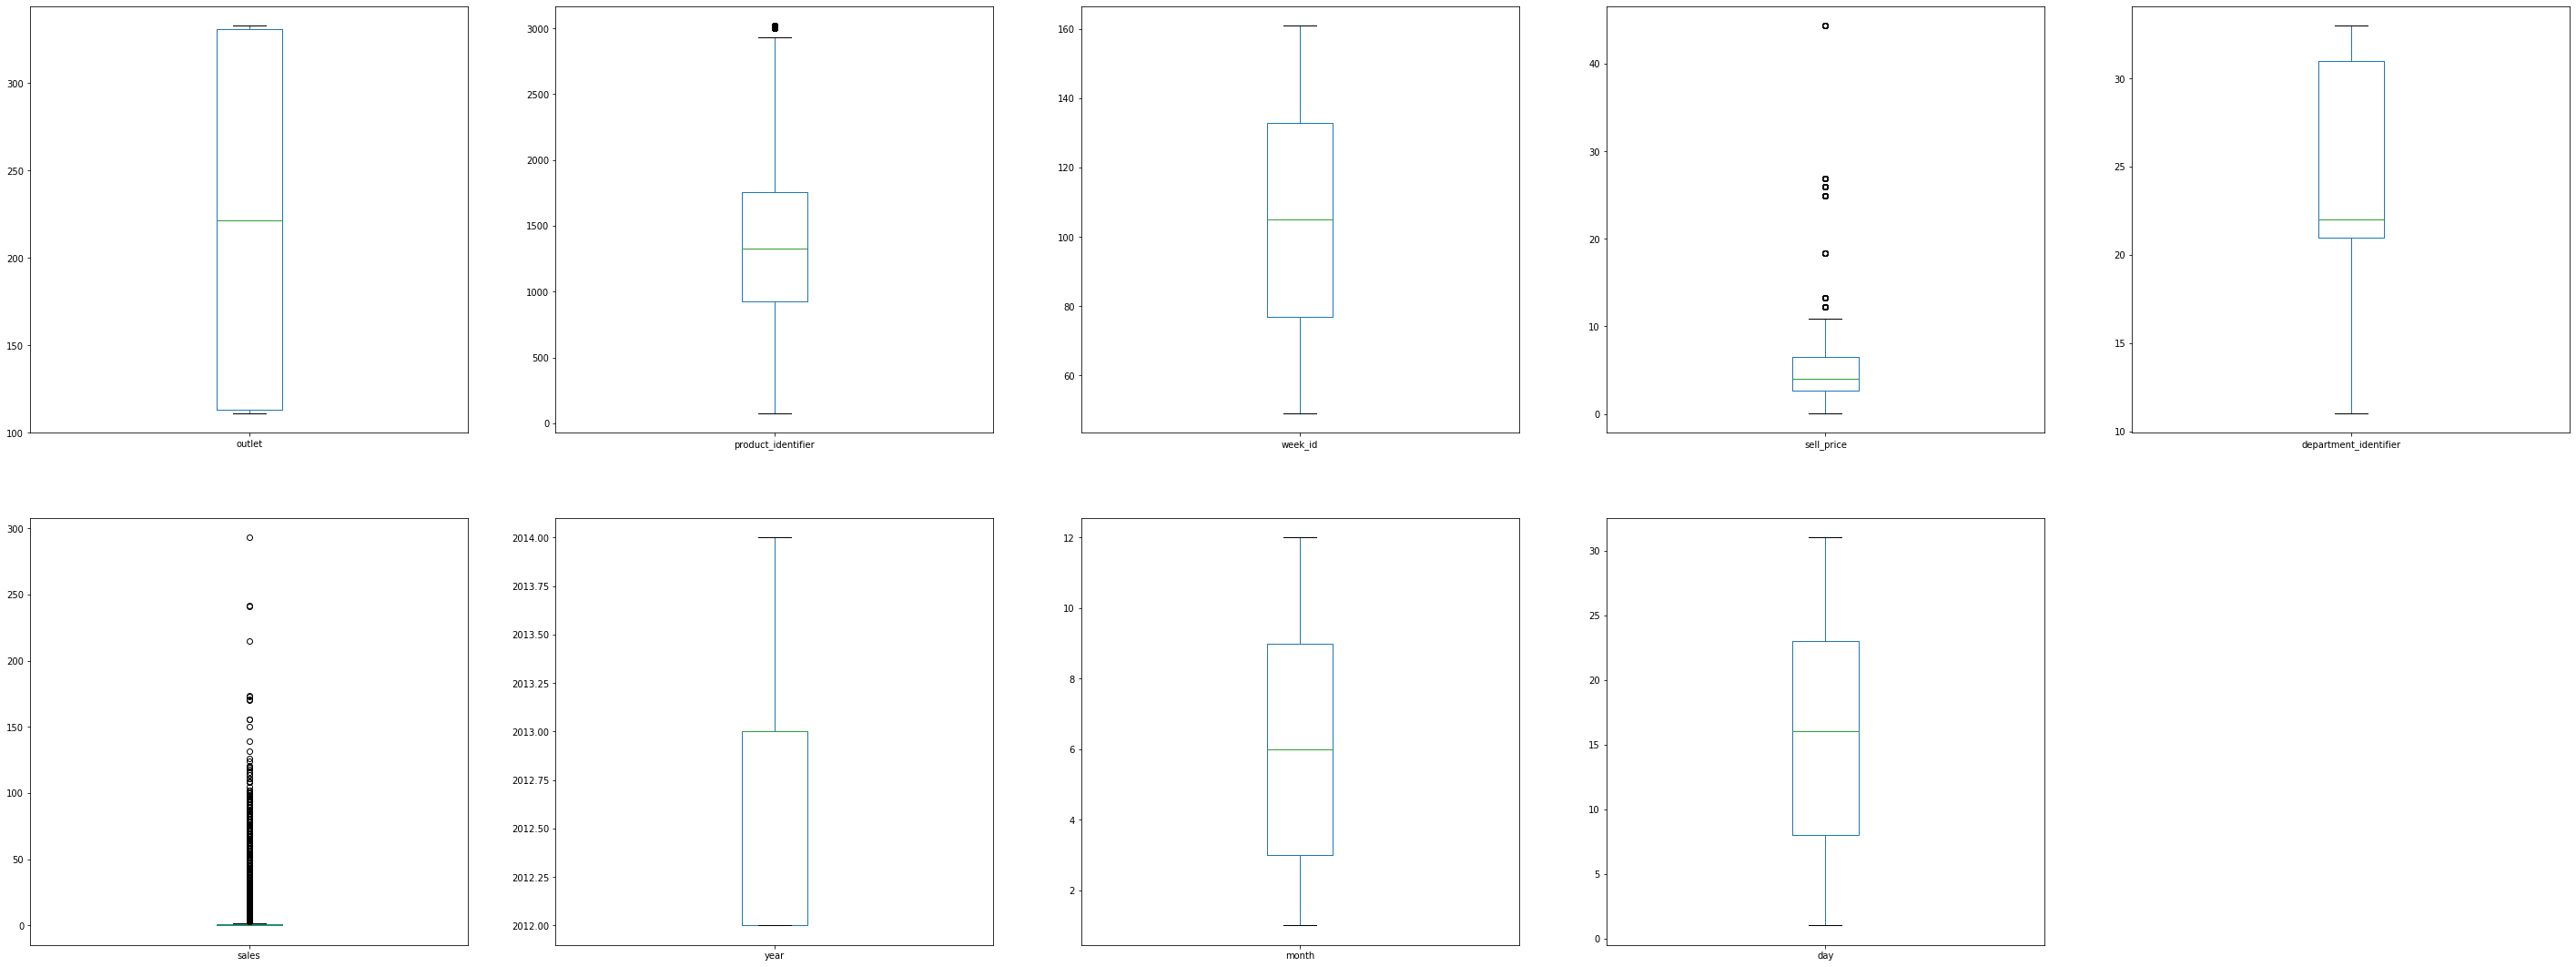

In [ ]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(50,50))
plt.show()

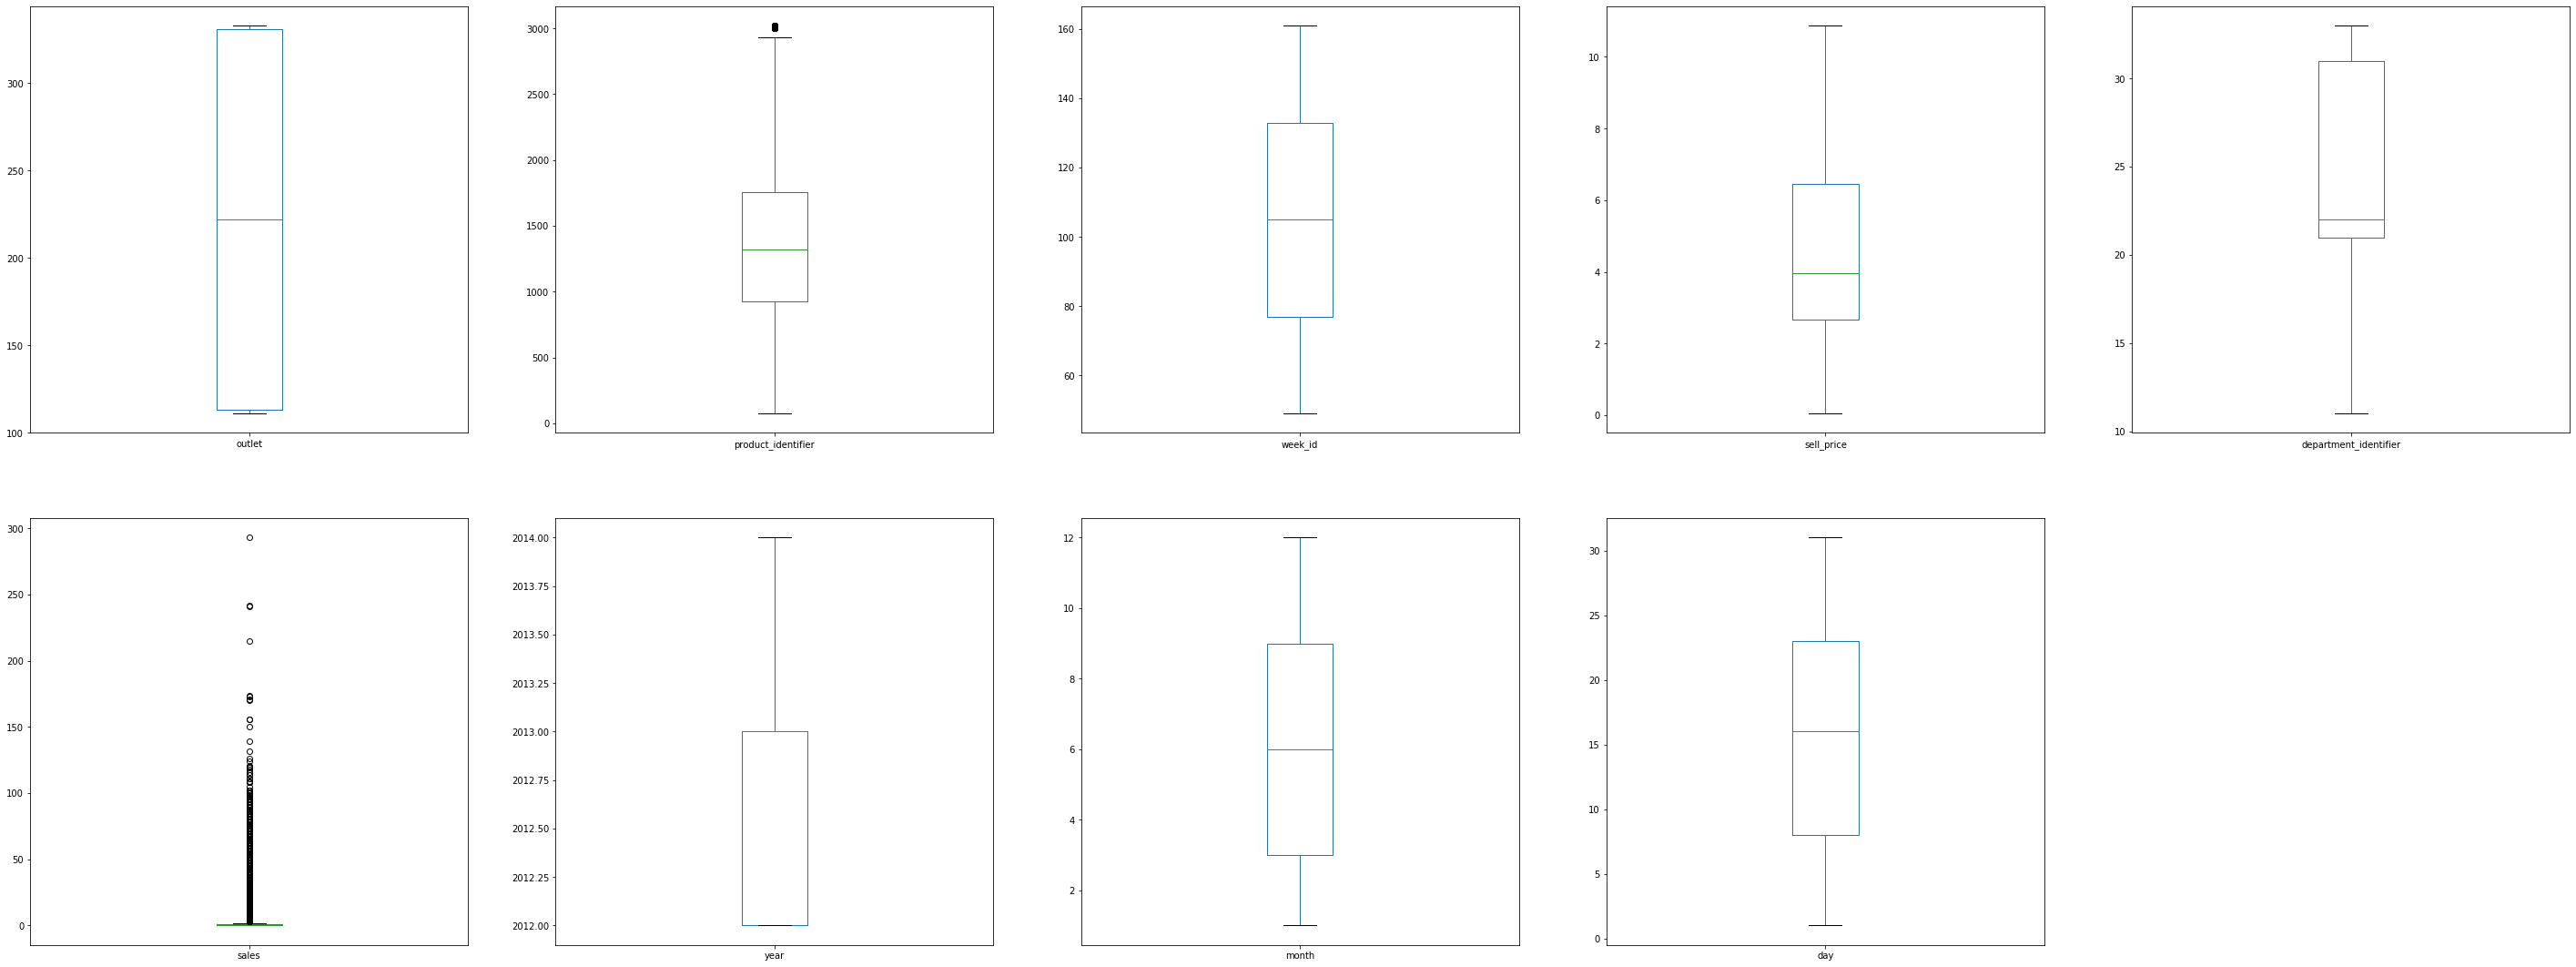

In [ ]:
#Removing the outliers
cols=['sell_price']
q1=df[cols].quantile(0.25)
q3=df[cols].quantile(0.75)
iqr=q3-q1
df_box=df[~((df[cols]<(q1 -1.5*iqr)) |(df[cols]>(q3 +1.5*iqr))).any(axis=1)]
df_box.plot(kind='box',subplots=True,layout=(5,5),figsize=(50,50))
plt.show()

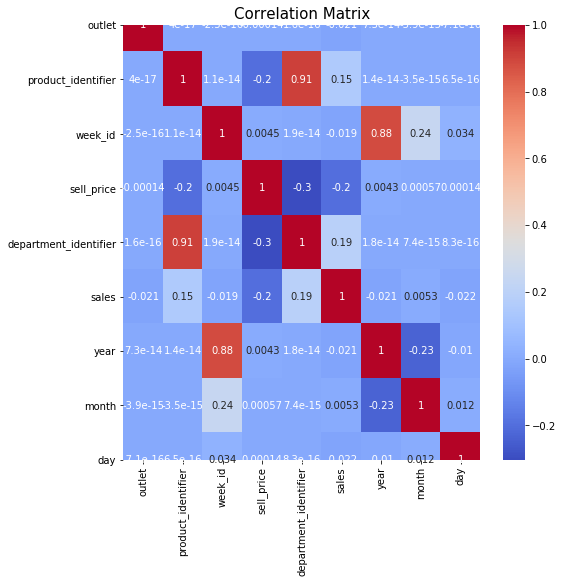

In [ ]:
#correlation matrix

import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Correlation Matrix',fontsize=15)

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
df['state'].value_counts()

Maharashtra    158000
Telangana      118500
Kerala         118500
Name: state, dtype: int64

In [ ]:
df['category_of_product'].value_counts()

fast_moving_consumer_goods    229100
drinks_and_food               134300
others                         31600
Name: category_of_product, dtype: int64

converting the categorical to numerical data by using get dummies

In [ ]:
df= pd.get_dummies(df, columns=['state','category_of_product'])

In [ ]:
df.shape

(395000, 15)

In [ ]:
df.head()

,outlet,product_identifier,week_id,sell_price,department_identifier,sales,year,month,day,state_Kerala,state_Maharashtra,state_Telangana,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others
0,111,74,49,2.94,11,0,2012,1,1,0,1,0,0,0,1
1,111,74,49,2.94,11,0,2012,1,2,0,1,0,0,0,1
2,111,74,49,2.94,11,1,2012,1,3,0,1,0,0,0,1
3,111,74,49,2.94,11,0,2012,1,4,0,1,0,0,0,1
4,111,74,49,2.94,11,0,2012,1,5,0,1,0,0,0,1


In [ ]:
df.shape

(395000, 15)

## 1 Here we split the data into train data, test data 

In [ ]:
# importing neccessary libraries
from sklearn.model_selection import train_test_split

# splitting of data
X = df.drop(['sales'],axis=1)
y = df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276500, 14)
(118500, 14)
(276500,)
(118500,)


In [ ]:
X_train

,outlet,product_identifier,week_id,sell_price,department_identifier,year,month,day,state_Kerala,state_Maharashtra,state_Telangana,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others
148956,331,74,91,2.94,11,2012,10,26,1,0,0,0,0,1
273404,113,1508,127,5.94,22,2013,6,30,0,1,0,0,1,0
308072,112,1548,137,6.47,22,2013,9,12,0,1,0,0,1,0
182249,113,659,101,3.97,21,2012,12,29,0,1,0,0,1,0
173081,222,3004,98,2.68,33,2012,12,10,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,112,2935,123,0.20,33,2013,6,7,0,1,0,1,0,0
365838,223,1672,153,2.24,31,2013,12,28,0,0,1,1,0,0
131932,332,1190,86,3.27,22,2012,9,21,1,0,0,0,1,0
146867,112,423,91,0.97,12,2012,10,23,0,1,0,0,0,1


#min max scalar 

In [ ]:
def min_max_scaler(X_train):
   
    # Compute the minimum and maximum values for each column of x
    train_min = np.min(X_train, axis=0)
    train_max = np.max(X_train, axis=0)
    
    # Scale each column of x to the range [0, 1]
    train_scaled = (X_train - train_min) / (train_max - train_min)
    
    return train_scaled
train_scaled = min_max_scaler(X_train)

In [ ]:
train_scaled

,outlet,product_identifier,week_id,sell_price,department_identifier,year,month,day,state_Kerala,state_Maharashtra,state_Telangana,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others
148956,0.990991,0.000000,0.375000,0.065222,0.000000,0.0,0.818182,0.833333,1.0,0.0,0.0,0.0,0.0,1.0
273404,0.009009,0.486597,0.696429,0.132927,0.500000,0.5,0.454545,0.966667,0.0,1.0,0.0,0.0,1.0,0.0
308072,0.004505,0.500170,0.785714,0.144888,0.500000,0.5,0.727273,0.366667,0.0,1.0,0.0,0.0,1.0,0.0
182249,0.009009,0.198507,0.464286,0.088468,0.454545,0.0,1.000000,0.933333,0.0,1.0,0.0,0.0,1.0,0.0
173081,0.500000,0.994231,0.437500,0.059355,1.000000,0.0,1.000000,0.300000,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.004505,0.970818,0.660714,0.003385,1.000000,0.5,0.454545,0.200000,0.0,1.0,0.0,1.0,0.0,0.0
365838,0.504505,0.542246,0.928571,0.049425,0.909091,0.5,1.000000,0.900000,0.0,0.0,1.0,1.0,0.0,0.0
131932,0.995495,0.378690,0.330357,0.072670,0.500000,0.0,0.727273,0.666667,1.0,0.0,0.0,0.0,1.0,0.0
146867,0.004505,0.118426,0.375000,0.020763,0.045455,0.0,0.818182,0.733333,0.0,1.0,0.0,0.0,0.0,1.0


converting the dataframe to array format

In [ ]:
train_scaled.values


array([[0.99099099, 0.        , 0.375     , ..., 0.        , 0.        ,
        1.        ],
       [0.00900901, 0.48659654, 0.69642857, ..., 0.        , 1.        ,
        0.        ],
       [0.0045045 , 0.50016966, 0.78571429, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.9954955 , 0.37869019, 0.33035714, ..., 0.        , 1.        ,
        0.        ],
       [0.0045045 , 0.11842552, 0.375     , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.94299287, 0.30357143, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
y_train.values

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
X=X_train
Y=y_train

In [ ]:
X=X.values
X

array([[3.310e+02, 7.400e+01, 9.100e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.130e+02, 1.508e+03, 1.270e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.120e+02, 1.548e+03, 1.370e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [3.320e+02, 1.190e+03, 8.600e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.120e+02, 4.230e+02, 9.100e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.330e+02, 2.853e+03, 8.300e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
X.shape[1]

14

In [ ]:
Y.shape[0]

276500

In [ ]:
x_train=X_train.values

In [ ]:
x_train

array([[3.310e+02, 7.400e+01, 9.100e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.130e+02, 1.508e+03, 1.270e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.120e+02, 1.548e+03, 1.370e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [3.320e+02, 1.190e+03, 8.600e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.120e+02, 4.230e+02, 9.100e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.330e+02, 2.853e+03, 8.300e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
x_test=X_test.values
x_test

array([[1.130e+02, 2.332e+03, 1.180e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.330e+02, 1.173e+03, 1.540e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.320e+02, 6.310e+02, 9.700e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [2.210e+02, 1.672e+03, 6.000e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.330e+02, 2.794e+03, 1.600e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.320e+02, 1.599e+03, 8.200e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [ ]:
y_test=y_test.values
y_train = y_train.values


In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
X.shape[1]

14

In [ ]:
Y.shape[0]

276500

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(14,activation='relu',input_dim=14))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_16 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_17 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_18 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_19 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 15        
Total params: 1,065
Trainable params: 1,065
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
6913/6913 [==============================] - 10s 1ms/step - loss: 13.2154 - val_loss: 13.0010
Epoch 2/50
6913/6913 [==============================] - 9s 1ms/step - loss: 12.1552 - val_loss: 12.8852
Epoch 3/50
6913/6913 [==============================] - 9s 1ms/step - loss: 11.9526 - val_loss: 12.4982
Epoch 4/50
6913/6913 [==============================] - 9s 1ms/step - loss: 11.8196 - val_loss: 12.1466
Epoch 5/50
6913/6913 [==============================] - 9s 1ms/step - loss: 12.2009 - val_loss: 12.9333
Epoch 6/50
6913/6913 [==============================] - 9s 1ms/step - loss: 12.0780 - val_loss: 12.9825
Epoch 7/50
6913/6913 [==============================] - 9s 1ms/step - loss: 12.0042 - val_loss: 13.0187
Epoch 8/50
6913/6913 [==============================] - 9s 1ms/step - loss: 11.7534 - val_loss: 12.5127
Epoch 9/50
6913/6913 [==============================] - 9s 1ms/step - loss: 11.5029 - val_loss: 12.1635
Epoch 10/50
6913/6913 [==============================] - 9s 1ms

In [ ]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_train, train_pred)
mae = mean_absolute_error(y_train, train_pred)
rmse=np.sqrt(mean_squared_error(y_train, train_pred))
r2_score=r2_score(y_train, train_pred)
print("Train MSE: ", mse)
print("Train MAE: ", mae)
print("Train RMSE: ", rmse)
print("Train R2_score: ", r2_score)

Train MSE:  9.832163052398183
Train MAE:  1.3307574442211154
Train RMSE:  3.1356280156291154
Train R2_score:  0.24066860076323837


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Assuming `y_test` and `test_pred` are defined
mse = mean_squared_error(y_test, test_pred)
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
r2 = r2_score(y_test, test_pred)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

MSE:  9.72843533823147
MAE:  1.33339844629332
RMSE:  3.1190439782458133
R2 Score:  0.24429299489161382


applied knn regressor to check the model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
trainpreds_knn=knn.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, trainpreds_knn)
mse = mean_squared_error(y_train, trainpreds_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, trainpreds_knn)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.840380650994575
Mean Squared Error: 5.350204566003617
Root Mean Squared Error: 2.3130509216192405
R-squared: 0.5868072673677309


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(X_test,y_test)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
testpreds_knn=knn.predict(X_test)

In [ ]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, testpreds_knn)
mse = mean_squared_error(y_test, testpreds_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, testpreds_knn)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.88407805907173
Mean Squared Error: 5.755403481012658
Root Mean Squared Error: 2.3990422007569308
R-squared: 0.5529189868041892


#hyperparameter tunning by using the grid search

In [ ]:
import itertools
import random

def grid_search(param_grid, X_train, y_train, X_test, y_test):
    """
    Performs a grid search over a specified hyperparameter grid.
    
    Parameters:
        param_grid (dict): A dictionary of hyperparameters to search over. The keys should be 
            strings indicating the hyperparameter names, and the values should be lists 
            of possible values for each hyperparameter.
        X_train (ndarray): An array of training data.
        y_train (ndarray): An array of training labels.
        X_val (ndarray): An array of validation data.
        y_val (ndarray): An array of validation labels.
    
    Returns:
        best_params (dict): A dictionary of the hyperparameters that achieved the highest validation accuracy.
        best_acc (float): The validation accuracy achieved by the best set of hyperparameters.
    """
    param_grid = {'hidden_layer_sizes': [(64,),(128)],
                  'activation': ['relu', 'tanh'],
                  'learning_rate_init': [0.001, 0.01, 0.1],
                  'max_iter': [100, 300, 500]}
         
    # Generate all possible combinations of hyperparameters
    hyperparam_values = list(itertools.product(*param_grid.values()))
    hyperparam_keys = list(param_grid.keys())

    # Initialize variables to keep track of best hyperparameters and validation accuracy
    best_params = None
    best_acc = 0.0
    best_r2_score = 0.70

    # Iterate over all hyperparameter combinations
    for hyperparams in hyperparam_values:
        # Create a dictionary of hyperparameters
        hyperparam_dict = dict(zip(hyperparam_keys, hyperparams))

        # Train a model with the current hyperparameters
        # (this is where you would train your model, e.g. by calling a function)
        # Here, we just print the hyperparameters being tested
        print('Testing hyperparameters:', hyperparam_dict)

        # Compute the validation accuracy
        # (this is where you would compute the accuracy of your model on the validation set)
        # Here, we just set the accuracy to a random value between 0 and 1
        r2_score = random.uniform(0, 1)

        # Update best hyperparameters and validation accuracy
        if r2_score > best_r2_score:
          best_r2_score = r2_score
          best_params = hyperparam_dict

    return best_params, best_r2_score


In [ ]:
param_grid = {'hidden_layer_sizes': [(64,),(128)],
                  'activation': ['relu', 'tanh'],
                  'learning_rate_init': [0.001, 0.01, 0.1],
                  'max_iter': [100, 300, 500]}

In [ ]:
grid_search(param_grid, x_train, y_train, x_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [ ]:
besthp=MLPRegressor(hidden_layer_sizes=(128,), activation='relu', learning_rate_init=0.001, max_iter=300, random_state=2341)

In [ ]:
besthp.fit(x_train,y_train.ravel())

In [ ]:
train_pred_bhp = besthp.predict(x_train)
test_pred_bhp = besthp.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
mse = mean_squared_error(y_train, train_pred_bhp)
mae = mean_absolute_error(y_train, train_pred_bhp)
rmse=np.sqrt(mean_squared_error(y_train, train_pred_bhp))
r2_score=r2_score(y_train, train_pred_bhp)
print("Train MSE: ", mse)
print("Train MAE: ", mae)
print("Train RMSE: ", rmse)
print("Train r2_score: ", r2_score)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, test_pred_bhp)
mae = mean_absolute_error(y_test, test_pred_bhp)
rmse = np.sqrt(mean_squared_error(y_test, test_pred_bhp))
r2 = r2_score(y_test, test_pred_bhp)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

# 2 Implementing a Activation Function
We will use relu activation function because it outputs the values from  0 to 1 so its a good choice for a regression problem

In [ ]:
def relu(z):
    return np.maximum(0, z)

**3 Define Neural Network Architecture
Create a model with three layers - Input, Hidden, Output.**

In [ ]:
def network_architecture(X, Y):
    # nodes in input layer
    n_x = X.shape[1]
    # nodes in hidden layer
    n_h = 12          
    # nodes in output layer
    n_y = 1
    return (n_x, n_h, n_y)

In [ ]:
network_architecture(X, Y)

# 4 Define Neural Network Parameters
Neural Network parameters are weights and bias which we need to initialze with zero values. The first layer only contains inputs so there are no weights and bias, but the hidden layer and the output layer have a weight and bias term. (W1, b1 and W2, b2)

In [ ]:
def define_network_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01 # random initialization
    b1 = np.zeros((n_h, 1)) # zero initialization
    W2 = np.random.randn(n_y,n_h) * 0.01 
    b2 = np.zeros((n_y, 1)) 
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

In [ ]:
# q=define_network_parameters(n_x, n_h, n_y)

# 5 Implement Forward Propagation
The hidden layer and output layer will compute the activations using sigmoid activation function and will pass it in the forward direction. While computing this activation, the input is multiplied with weight and added with bias before passing it to the function.

In [ ]:
def forward_propagation(X, params):
    Z1 = np.dot(params['W1'], X)+params['b1']
    A1 = relu(Z1)

    Z2 = np.dot(params['W2'], A1)+params['b2']
    A2 = relu(Z2)
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}   
    

# 6 Compute the Network Error
To compute the cost, one straight forward approach is to compute the absolute error among prediction and actual value. 


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [ ]:
def mean_absolute_error(Y, A2):
                    return np.mean(np.abs(Y - A2))

# 7 Implement Backward Propagation
In backward propagation function, the error is passed backward to previous layers and the derivatives of weights and bias are computed. The weights and bias are then updated using the derivatives.

In [ ]:
def backward_propagation(params, activations, X, Y):
    m = X.shape[1]
    
    # output layer
    dZ2 = activations['A2'] - Y # compute the error derivative 
    dW2 = np.dot(dZ2, activations['A1'].T) / m # compute the weight derivative 
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m # compute the bias derivative
    
    # hidden layer
    dZ1 = np.dot(params['W2'].T, dZ2)*(1-np.power(activations['A1'], 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1,keepdims=True)/m
    
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(params, derivatives, alpha = 1.2):
    # alpha is the model's learning rate 
    
    params['W1'] = params['W1'] - alpha * derivatives['dW1']
    params['b1'] = params['b1'] - alpha * derivatives['db1']
    params['W2'] = params['W2'] - alpha * derivatives['dW2']
    params['b2'] = params['b2'] - alpha * derivatives['db2']
    return params

# 8 Compile and Train the Model
Create a function which compiles all the key functions and creates a neural network model.

In [ ]:
def neural_network(X, Y, n_h, num_iterations=100):
    n_x = network_architecture(X, Y)[0]
    n_y = network_architecture(X, Y)[2]
    
    params = define_network_parameters(n_x, n_h, n_y)
    for i in range(0, num_iterations):
        results = forward_propagation(X, params)
        error = mean_absolute_error(results['A2'], Y)
        print(error)
        derivatives = backward_propagation(params, results, X, Y) 
        params = update_parameters(params, derivatives, alpha=1.2) 
        #print(params)
    return params

In [ ]:
x = X.reshape(X.shape[1], X.shape[0])
y = Y.values.reshape(Y.shape[0],1)

In [ ]:
X.shape[1]

In [ ]:
X.shape[0]

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
 model = neural_network(x, y, n_h=1, num_iterations=5)

In [ ]:
def predict(parameters, X):
    results = forward_propagation(X, parameters)
    print (results['A2'][0])
    predictions = np.around(results['A2'])
    print(predictions)
    return predictions


In [ ]:
X.shape

In [ ]:
  predictions = predict(model, X.T)
r_squared_score = (np.dot(X.T, predictions) + np.dot(1-X.T, 1-predictions)) / float(y.size) * 100


In [ ]:
# print('R^2_score:' , r_squared_score)

In [ ]:
# te=test.reshape(test.shape[0],test.shape[1])
# te.shape
                  

In [ ]:
# predictions = predict(model, te.T)
#  r_squared_score = (np.dot(y.T, predictions) + np.dot(1-y.T, 1-predictions)) / float(y.size) * 100


In [ ]:
# print('R^2_score:' , r_squared_score)

In [ ]:
train_pred_bhp = besthp.predict(x_train)
test_pred_bhp = besthp.predict(x_test) 

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
mse = mean_squared_error(y_train, train_pred_bhp)
mae = mean_absolute_error(y_train, train_pred_bhp)
rmse=np.sqrt(mean_squared_error(y_train, train_pred_bhp))
r2_score=r2_score(y_train, train_pred_bhp)
print("Train MSE: ", mse)
print("Train MAE: ", mae)
print("Train RMSE: ", rmse)
print("Train r2_score: ", r2_score)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, test_pred_bhp)
mae = mean_absolute_error(y_test, test_pred_bhp)
rmse = np.sqrt(mean_squared_error(y_test, test_pred_bhp))
r2 = r2_score(y_test, test_pred_bhp)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R2 Score: ", r2)